In [3]:
import lzma
import pandas as pd
import matplotlib.pyplot as plt
import tarfile
from io import StringIO

In [4]:
def preprocess_line(line):
    fields = line.strip().split(',')
    if len(fields) > 11:  # Assuming there should be 11 fields
        fields[3] = '.'.join(fields[3:3 + (len(fields) - 11) + 1])
        del fields[4:4 + (len(fields) - 11)]
    return ','.join(fields)


def read_and_preprocess(tar_path):
    with tarfile.open(tar_path, 'r:gz') as tar:
        for member in tar.getmembers():
            if member.isfile() and member.name.endswith('.csv'):
                # Extract file content
                f = tar.extractfile(member)
                if f:
                    # Read and preprocess the data
                    content = StringIO()
                    for line in f:
                        processed_line = preprocess_line(line.decode('utf-8'))
                        content.write(processed_line + '\n')

                    # Reset the pointer of StringIO object to the beginning
                    content.seek(0)

                    # Load the data into a DataFrame
                    df = pd.read_csv(content)
                    return df

In [ ]:
import os
wd = "//wsl.localhost/ubuntu/home/gw240/projects/alibaba/clusterdata/cluster-trace-microservices-v2022/data/CallGraph/"
file_path = os.path.join(wd, f"CallGraph_0.tar.gz")
MSCallGraph = read_and_preprocess(file_path) # preprocess to handle mismatched number of columns

In [6]:
with open("data/MSCallGraphsProcessed/0.pkl", "rb") as f:
    df = pd.read_pickle(f)

In [3]:
filtered_df = df[df['pattern_list'].apply(lambda x: len(x) > 1)]

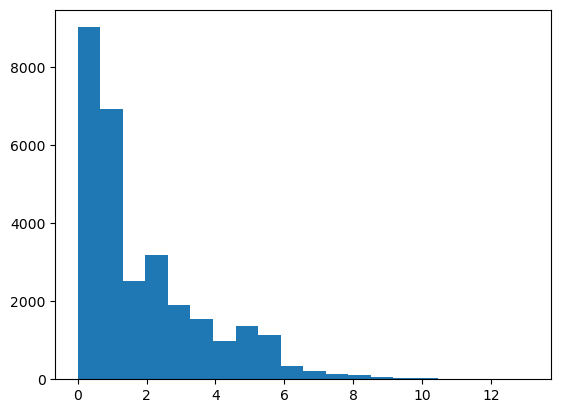

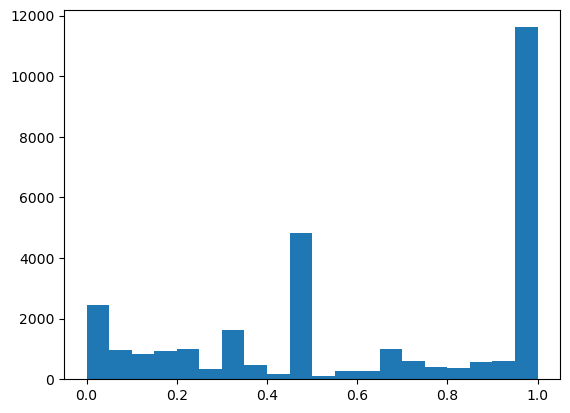

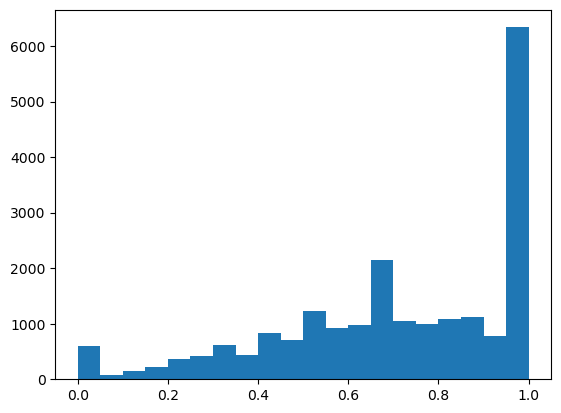

In [4]:
plt.hist(filtered_df["entropy"],bins=20)
plt.show()
plt.hist(filtered_df["diversity"],bins=20)
plt.show()
plt.hist(filtered_df["jaccard"],bins=20)
plt.show()

In [110]:
import pickle
with lzma.open("data/entropy_diversity_results/0.xz","rb") as f:
    pd.read_pickle(f)

In [ ]:
with open("data/0","wb") as f:
    pickle.dump(df,f)

In [114]:
with open("data/0","rb") as f:
    z = pickle.load(f)

In [91]:
with lzma.open("data/entropy_diversity_results/2.xz", "rb") as f:
    df = pd.read_pickle(f)

In [92]:
filtered_df = df[df['pattern_list'].apply(lambda x: len(x) > 100)]

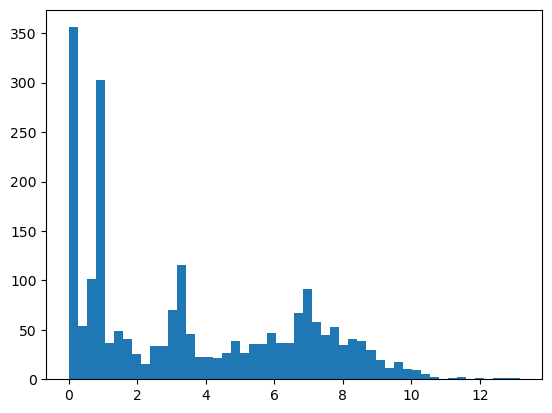

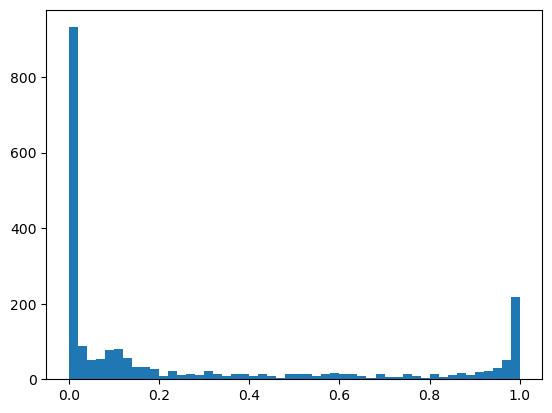

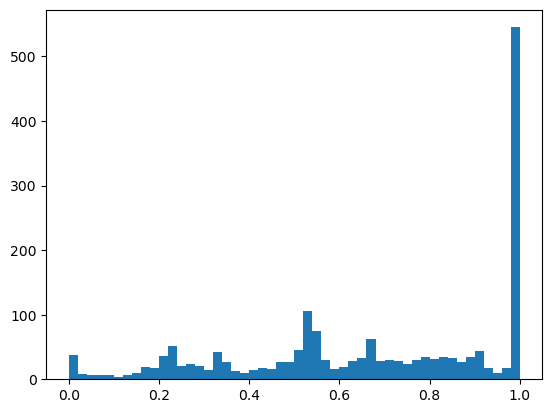

In [93]:
plt.hist(filtered_df["entropy"], bins=50)
plt.show()
plt.hist(filtered_df["diversity"], bins=50)
plt.show()
plt.hist(filtered_df["jaccard"], bins=50)
plt.show()

In [0]:
with lzma.open("data/entropy_diversity_results/340.xz", "rb") as f:
    df2 = pd.read_pickle(f)
    
filtered_df2 = df2[df2['pattern_list'].apply(lambda x: len(x) > 1)]

In [ ]:
plt.hist(filtered_df2["entropy"],bins=100)
plt.show()
plt.hist(filtered_df2["diversity"],bins=100)
plt.show()
plt.hist(filtered_df2["jaccard"],bins=100)
plt.show()

In [63]:
z = (df2)[df2["service"] == 'S_17454060']["pattern_list"]
z = tuple(sorted(tuple(sub) for sub in z))
z = tuple(sorted(tuple(sub) for sub in z[0]))
z = set(z)

In [30]:
import networkx as nx
import matplotlib.pyplot as plt

def build_and_draw_tree(relations):
    # Create a directed graph
    G = nx.DiGraph()
    
    # Add edges based on the provided relations (child, parent)
    for child, parent in relations:
        G.add_edge(parent, child)
    
    # Define the position layout for the tree
    pos = nx.spring_layout(G)
    # Drawing nodes
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue')
    # Drawing edges
    nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray')
    # Node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    
    # Show the plot
    plt.show()

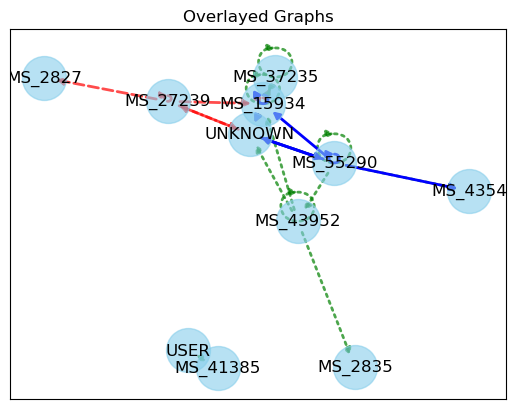

In [67]:
z = list(z)
relations1 = z[0]
relations2 = z[1]
relations3 = z[2]
# Create graphs for each set of relations
G1 = nx.DiGraph()
G1.add_edges_from(relations1)
G2 = nx.DiGraph()
G2.add_edges_from(relations2)
G3 = nx.DiGraph()
G3.add_edges_from(relations3)

# Combine all nodes and edges in a single graph for plotting
G = nx.DiGraph()
for graph in [G1, G2, G3]:
    G.add_nodes_from(graph.nodes(data=True))
    G.add_edges_from(graph.edges(data=True))

# Define positions of nodes (layout)
pos = nx.spring_layout(G)  # Using spring layout; you might choose another

# Draw the graphs
nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='skyblue', alpha=0.6)
nx.draw_networkx_labels(G, pos)

# Drawing each graph with different colors and styles
nx.draw_networkx_edges(G1, pos, edge_color="red", style="dashed", width=2,alpha=0.7)
nx.draw_networkx_edges(G2, pos, edge_color="green", style="dotted", width=2,alpha=0.7)
nx.draw_networkx_edges(G3, pos, edge_color="blue", width=2)

plt.title('Overlayed Graphs')
plt.show()

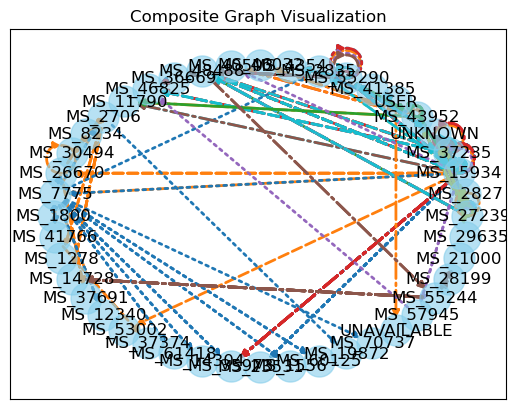

In [72]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_composite_graph(graphs, styles=None, layout='spring_layout'):
    # Create a main graph to determine the unified layout
    G = nx.DiGraph()
    for edges in graphs:
        G.add_edges_from(edges)

    # Set node positions
    if layout == 'spring_layout':
        pos = nx.spring_layout(G)
    elif layout == 'circular_layout':
        pos = nx.circular_layout(G)
    else:
        pos = nx.random_layout(G)
    
    # Define color maps
    colors = list(mcolors.TABLEAU_COLORS)  # Use Tableau's color map
    edge_styles = ['solid', 'dashed', 'dotted', 'dashdot']
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue', alpha=0.6)
    nx.draw_networkx_labels(G, pos)

    # Draw each graph with a different style and color
    for i, edges in enumerate(graphs):
        color = colors[i % len(colors)]
        style = edge_styles[i % len(edge_styles)] if not styles else styles[i % len(styles)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, style=style, width=2, arrowsize=10)

    plt.title('Composite Graph Visualization')
    plt.show()

draw_composite_graph(z[:100], layout="circular_layout")

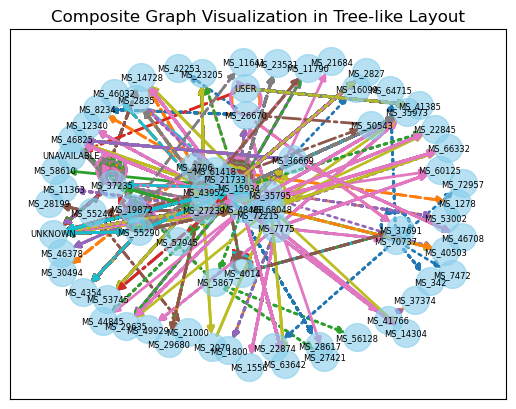

In [82]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def draw_composite_graph_as_tree(graphs, styles=None):
    # Create a main graph to determine the unified layout
    G = nx.DiGraph()
    for edges in graphs:
        G.add_edges_from(edges)

    # Set node positions using a modified spring layout to mimic a tree
    pos = nx.spring_layout(G, k=0.75, iterations=50)  # Adjust `k` and `iterations` for a more tree-like display
    
    # Define color maps
    colors = list(mcolors.TABLEAU_COLORS)  # Use Tableau's color map
    edge_styles = ['solid', 'dashed', 'dotted', 'dashdot']
    
    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=400, node_color='skyblue', alpha=0.6)
    nx.draw_networkx_labels(G, pos, font_size=6)

    # Draw each graph with a different style and color
    for i, edges in enumerate(graphs):
        color = colors[i % len(colors)]
        style = edge_styles[i % len(edge_styles)] if not styles else styles[i % len(styles)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=color, style=style, width=2, arrowsize=10)

    plt.title('Composite Graph Visualization in Tree-like Layout')
    plt.show()

# Example usage with more complex relationships
graphs = [
    [('A', 'B'), ('B', 'C'), ('C', 'D')],
    [('A', 'C'), ('A', 'D'), ('D', 'E')],
    [('B', 'E'), ('C', 'E')],
    [('D', 'A'), ('E', 'B'), ('A', 'F'), ('F', 'G')]  # Adding another graph for more complexity
]
draw_composite_graph_as_tree(z[:500])


In [43]:
with lzma.open("data/entropy_diversity_results/1.xz", "rb") as f:
    df2 = pd.read_pickle(f)

KeyboardInterrupt: 

(array([ 3460.,  1788.,  1284.,  2025.,  4973.,   412.,  1236.,  1106.,
          933., 11976.]),
 array([1.80228891e-04, 1.00162206e-01, 2.00144183e-01, 3.00126160e-01,
        4.00108137e-01, 5.00090114e-01, 6.00072092e-01, 7.00054069e-01,
        8.00036046e-01, 9.00018023e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

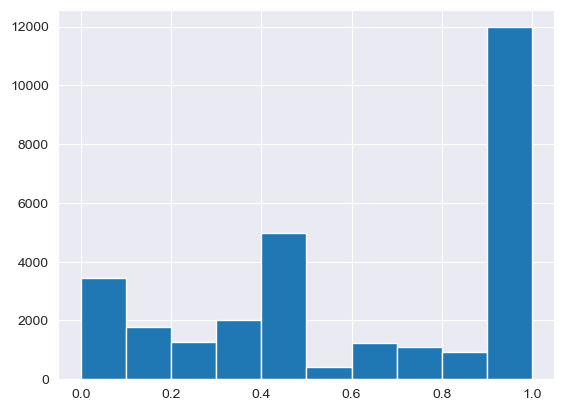

In [33]:
filtered_df2 = df2[df2['pattern_list'].apply(lambda x: len(x) > 1)]
plt.hist(filtered_df2["diversity"])

(array([1.5831e+04, 5.5840e+03, 3.4160e+03, 2.6310e+03, 1.2040e+03,
        2.9700e+02, 1.6800e+02, 5.2000e+01, 6.0000e+00, 4.0000e+00]),
 array([ 0.        ,  1.31884383,  2.63768766,  3.95653149,  5.27537531,
         6.59421914,  7.91306297,  9.2319068 , 10.55075063, 11.86959446,
        13.18843829]),
 <BarContainer object of 10 artists>)

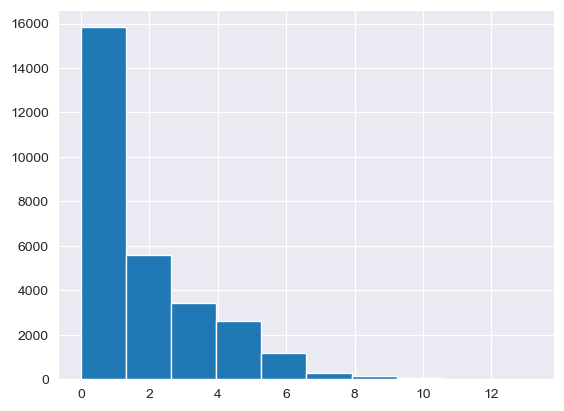

In [36]:
plt.hist(filtered_df2["entropy"])

(array([ 666.,  347.,  730., 1047., 1557., 2180., 3097., 1961., 2168.,
        6866.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

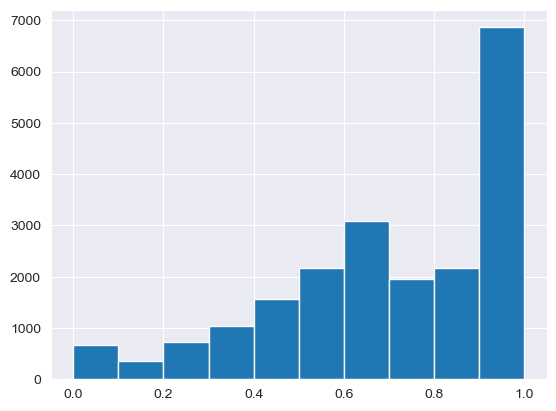

In [37]:
plt.hist(filtered_df2["jaccard"])

In [16]:
with lzma.open("data/entropy_diversity_results/2.xz", "rb") as f:
    df3 = pd.read_pickle(f)

(array([ 3341.,  1800.,  1244.,  2103.,  4937.,   392.,  1240.,  1042.,
          922., 11780.]),
 array([1.80848178e-04, 1.00162763e-01, 2.00144679e-01, 3.00126594e-01,
        4.00108509e-01, 5.00090424e-01, 6.00072339e-01, 7.00054254e-01,
        8.00036170e-01, 9.00018085e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

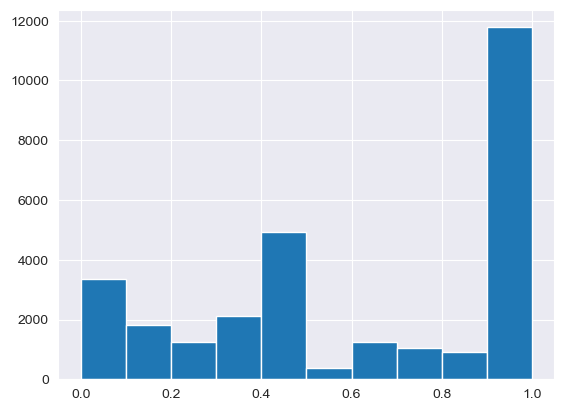

In [17]:
filtered_df3 = df3[df3['pattern_list'].apply(lambda x: len(x) > 1)]
plt.hist(filtered_df3["diversity"])

(array([ 3378.,  1789.,  1250.,  2085.,  4923.,   363.,  1234.,   980.,
          931., 11869.]),
 array([1.55255395e-04, 1.00139730e-01, 2.00124204e-01, 3.00108679e-01,
        4.00093153e-01, 5.00077628e-01, 6.00062102e-01, 7.00046577e-01,
        8.00031051e-01, 9.00015526e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

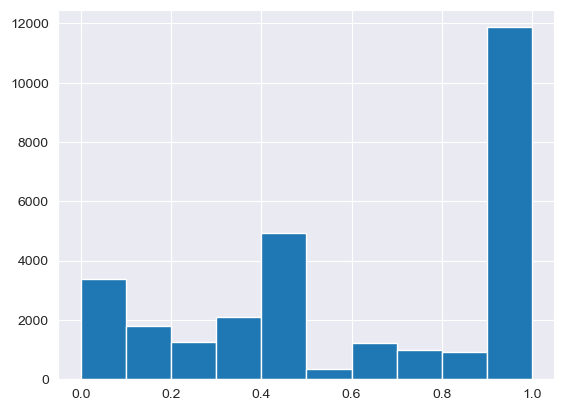

In [19]:
with lzma.open("data/entropy_diversity_results/3.xz", "rb") as f:
    df4 = pd.read_pickle(f)
filtered_df4 = df4[df4['pattern_list'].apply(lambda x: len(x) > 1)]
plt.hist(filtered_df4["diversity"])

(array([ 3328.,  1734.,  1300.,  2008.,  4668.,   386.,  1274.,  1002.,
          836., 11018.]),
 array([1.11234705e-04, 1.00100111e-01, 2.00088988e-01, 3.00077864e-01,
        4.00066741e-01, 5.00055617e-01, 6.00044494e-01, 7.00033370e-01,
        8.00022247e-01, 9.00011123e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

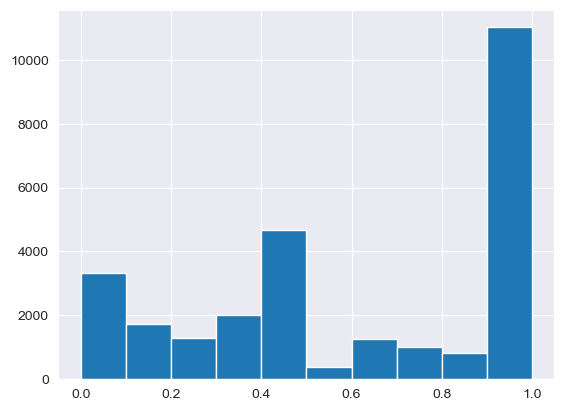

In [21]:
with lzma.open("data/entropy_diversity_results/14.xz", "rb") as f:
    df5 = pd.read_pickle(f)
filtered_df5 = df5[df5['pattern_list'].apply(lambda x: len(x) > 1)]
plt.hist(filtered_df5["diversity"])

In [1]:
import pandas as pd
with open("data/MSCallGraphsProcessed/479.pkl","rb") as f:
    df = pd.read_pickle(f)

In [2]:
df.memory_usage()

Index                 128
service            708792
pattern_list       708792
sorted_patterns    708792
unique_patterns    708792
dtype: int64

In [4]:
# Assuming 'df' is your DataFrame
total_memory_bytes = df.memory_usage(deep=True).sum()
total_memory_gb = total_memory_bytes / (1024 ** 3)  # Convert bytes to gigabytes

print(f"Total memory usage: {total_memory_gb*20} GB")

Total memory usage: 1.8586929328739643 GB


In [5]:
df.head(10)

,service,pattern_list,sorted_patterns,unique_patterns
0,S_100023471,"[[(UNKNOWN, MS_43940), (USER, MS_37575)]]","(((UNKNOWN, MS_43940), (USER, MS_37575)),)","{((UNKNOWN, MS_43940), (USER, MS_37575))}"
1,S_10002623,"[[(UNKNOWN, MS_9509), (UNAVAILABLE, MS_35501)]]","(((UNKNOWN, MS_9509), (UNAVAILABLE, MS_35501)),)","{((UNKNOWN, MS_9509), (UNAVAILABLE, MS_35501))}"
2,S_100030322,"[[(USER, MS_37575), (UNKNOWN, MS_43940)]]","(((USER, MS_37575), (UNKNOWN, MS_43940)),)","{((USER, MS_37575), (UNKNOWN, MS_43940))}"
3,S_100032711,"[[(USER, MS_37575), (UNKNOWN, MS_43940)]]","(((USER, MS_37575), (UNKNOWN, MS_43940)),)","{((USER, MS_37575), (UNKNOWN, MS_43940))}"
4,S_100034589,"[[(USER, MS_37575), (UNKNOWN, MS_43940)]]","(((USER, MS_37575), (UNKNOWN, MS_43940)),)","{((USER, MS_37575), (UNKNOWN, MS_43940))}"
5,S_100040631,"[[(UNKNOWN, MS_43940), (USER, MS_37575)]]","(((UNKNOWN, MS_43940), (USER, MS_37575)),)","{((UNKNOWN, MS_43940), (USER, MS_37575))}"
6,S_100047233,"[[(UNKNOWN, MS_43940), (USER, MS_37575)]]","(((UNKNOWN, MS_43940), (USER, MS_37575)),)","{((UNKNOWN, MS_43940), (USER, MS_37575))}"
7,S_100048413,"[[(UNKNOWN, MS_43940), (USER, MS_37575)]]","(((UNKNOWN, MS_43940), (USER, MS_37575)),)","{((UNKNOWN, MS_43940), (USER, MS_37575))}"
8,S_100048837,"[[(USER, MS_37575), (UNKNOWN, MS_43940)]]","(((USER, MS_37575), (UNKNOWN, MS_43940)),)","{((USER, MS_37575), (UNKNOWN, MS_43940))}"
9,S_100053949,"[[(USER, MS_37575), (UNKNOWN, MS_43940)]]","(((USER, MS_37575), (UNKNOWN, MS_43940)),)","{((USER, MS_37575), (UNKNOWN, MS_43940))}"


In [8]:
import numpy as np
import math
from itertools import combinations
def calculate_diversity(patterns):
    if not patterns:  # Check if the list is empty
        return np.nan
    unique_patterns = set(patterns)
    diversity = len(unique_patterns) / len(patterns)
    return diversity


def calculate_entropy(patterns):
    # Count the frequency of each unique pattern
    pattern_counts = {}
    for pattern in patterns:
        if pattern in pattern_counts:
            pattern_counts[pattern] += 1
        else:
            pattern_counts[pattern] = 1

    # Calculate probabilities
    total_patterns = len(patterns)
    probabilities = [count / total_patterns for count in pattern_counts.values()]

    # Calculate entropy
    entropy = -sum(p * math.log2(p) for p in probabilities if p > 0)
    return entropy

def jaccard_similarity(set1, set2):
    intersection = set1.intersection(set2)
    union = set1.union(set2)
    return len(intersection) / len(union) if union else 0

def mean_jaccard_similarity(patterns):
    patterns = set(patterns)
    if len(patterns) < 2:
        return np.nan  # Return NaN for cases with fewer than 2 unique patterns

    patterns = set(map(tuple, patterns))  # Convert list of patterns to a set of tuples
    similarities = (jaccard_similarity(set(a), set(b)) for a, b in combinations(patterns, 2))
    total, count = 0, 0
    for similarity in similarities:
        total += similarity
        count += 1
    return total / count if count else 0  # Safeguard against division by zero

In [27]:
set1 = (((1,2),(2,3)),((1,2),(3,4)),((1,2),(3,4)))
set2 = (((1,2),(2,3)),((1,2),(3,4)),((1,2),(2,3),(3,4)))

In [30]:
print(calculate_diversity(set1))
print(calculate_entropy(set1))
print(mean_jaccard_similarity(set1))

0.6666666666666666
0.9182958340544896
0.3333333333333333


In [31]:
print(calculate_diversity(set2))
print(calculate_diversity(set2))
print(mean_jaccard_similarity(set2))

1.0
1.0
0.5555555555555555


In [33]:
set3 = set1+set2

In [34]:
print(calculate_diversity(set3))
print(calculate_diversity(set3))
print(mean_jaccard_similarity(set3))

0.5
0.5
0.5555555555555555


In [ ]:
for i in range(0,5):
    with open(f"data/MSCallGraphsProcessed/{i}.pkl","rb") as f:
        df = pd.read_pickle(f)
    

In [37]:
# Append patterns to the aggregate dictionary
aggregate_patterns = {}
for index, row in df.iterrows():
    service_id = row['service']
    patterns = row['sorted_patterns']
    if service_id in aggregate_patterns:
        aggregate_patterns[service_id].extend(patterns)
    else:
        aggregate_patterns[service_id] = patterns